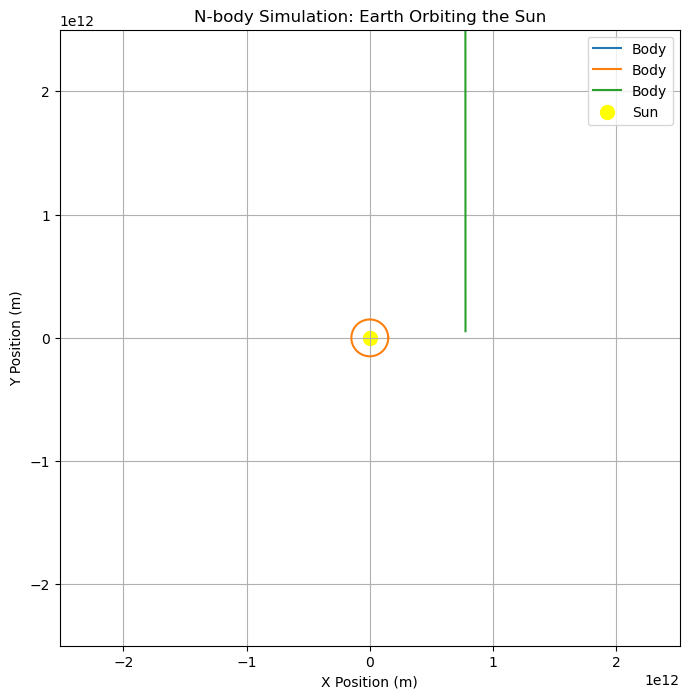

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype='float64')
        self.velocity = np.array(velocity, dtype='float64')

def compute_gravitational_force(body1, body2):
    distance_vector = body2.position - body1.position
    distance = np.linalg.norm(distance_vector)
    force_magnitude = G * body1.mass * body2.mass / distance**2
    return force_magnitude * distance_vector / distance  # Force vector

def update_positions(bodies, dt):
    for body in bodies:
        body.position += body.velocity * dt

def update_velocities(bodies, dt):
    for i, body1 in enumerate(bodies):
        total_force = np.zeros(2)
        for j, body2 in enumerate(bodies):
            if i != j:
                total_force += compute_gravitational_force(body1, body2)
        acceleration = total_force / body1.mass
        body1.velocity += acceleration * dt

def simulate(bodies, dt, steps):
    positions = [[] for _ in bodies]
    for _ in range(steps):
        update_velocities(bodies, dt)
        update_positions(bodies, dt)
        for i, body in enumerate(bodies):
            positions[i].append(body.position.copy())
    return positions

# Define bodies (mass in kg, position in meters, velocity in m/s)
sun = Body(1.989e30, [0, 0], [0, 0])  # Sun
earth = Body(5.972e24, [1.496e11, 0], [0, 29780])  # Earth
jup = Body(1.898e28, [777e9, 0], [0, 6.1e5])  # jupiter

# Run the simulation
dt = 60 * 60 * 24  # One day in seconds
steps = 365  # Simulate one year
bodies = [sun, earth, jup]
positions = simulate(bodies, dt, steps)

# Plotting the results
plt.figure(figsize=(8, 8))
for i, body in enumerate(bodies):
    positions_array = np.array(positions[i])
    plt.plot(positions_array[:, 0], positions_array[:, 1], label=f'{body.__class__.__name__}')
plt.scatter(0, 0, color='yellow', label='Sun', s=100)  # Sun's position
plt.title('N-body Simulation: Earth Orbiting the Sun')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.axis('equal')
plt.xlim(-.25e13, .25e13)
plt.ylim(-.25e13, .25e13)
plt.legend()
plt.grid()
plt.show()
